Import Libraries

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00


https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

Read CSV File

In [86]:
data=pd.read_csv("/content/drug.csv")

In [87]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


**Data Preprocessing**

In [88]:
print(data.isnull().sum())


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [89]:
print(data.nunique())


Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64


Replace Missing Values

In [90]:
#data.fillna(data.mean(), inplace=True)


<ipython-input-90-a20208f658ce>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


Encoding

In [91]:
label_encoder = LabelEncoder()
categorical_columns = ['Sex', 'BP', 'Cholesterol']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])


In [92]:
# after encoding the data will be
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


scalling of numerical columns

In [93]:
scaler = StandardScaler()
data[['Age', 'Na_to_K']] = scaler.fit_transform(data[['Age', 'Na_to_K']])


Splitting Training and Testing data

In [94]:
x = data.drop('Drug', axis=1)
y = data['Drug']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


**Decision Tree**

In [95]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

clf = clf.fit(x_train,y_train)
#y_train_pred= clf.predict(x_train)
y_pred= clf.predict(x_test)

Accuracy

In [96]:
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred))


Testing Accuracy: 1.0


Confusion matrix

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 6,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0, 15]])

classification report

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [59]:
#!pip install graphviz


In [60]:
#!pip install pydotplus


In [61]:
!#pip install six

In [99]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_4 <= -0.17
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 0.37
|   |   |   |--- class: drugA
|   |   |--- feature_0 >  0.37
|   |   |   |--- class: drugB
|   |--- feature_2 >  0.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: drugC
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: drugX
|   |   |--- feature_2 >  1.50
|   |   |   |--- class: drugX
|--- feature_4 >  -0.17
|   |--- class: drugY



[Text(0.625, 0.9, 'x[4] <= -0.174\ngini = 0.68\nsamples = 160\nvalue = [17, 13, 11, 43, 76]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.656\nsamples = 84\nvalue = [17, 13, 11, 43, 0]'),
 Text(0.25, 0.5, 'x[0] <= 0.375\ngini = 0.491\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\ngini = 0.324\nsamples = 54\nvalue = [0, 0, 11, 43, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\ngini = 0.499\nsamples = 23\nvalue = [0, 0, 11, 12, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 76\nvalue = [0, 0, 0, 0, 76]')]

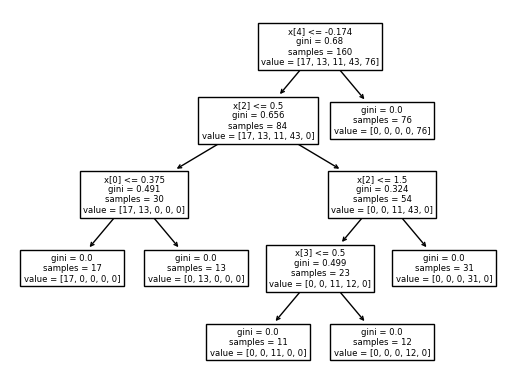

In [100]:
tree.plot_tree(clf)

In [101]:
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf2 = clf2.fit(x_train,y_train)
y_predict= clf2.predict(x_test)
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_predict))


Testing Accuracy: 1.0


[Text(0.625, 0.9, 'x[4] <= -0.174\nentropy = 1.923\nsamples = 160\nvalue = [17, 13, 11, 43, 76]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.762\nsamples = 84\nvalue = [17, 13, 11, 43, 0]'),
 Text(0.25, 0.5, 'x[0] <= 0.375\nentropy = 0.987\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\nentropy = 0.729\nsamples = 54\nvalue = [0, 0, 11, 43, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\nentropy = 0.999\nsamples = 23\nvalue = [0, 0, 11, 12, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 76\nvalue = [0, 0, 0, 0, 76]')]

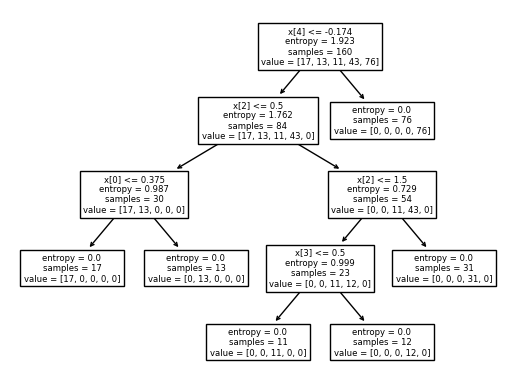

In [102]:
tree.plot_tree(clf2)

**Random Forest**

In [103]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [104]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [105]:
y_predict= rf.predict(x_test)
y_predict

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'drugY', 'drugA',
       'drugB', 'drugY', 'drugB', 'drugX', 'drugC', 'drugY', 'drugB',
       'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugC', 'drugC', 'drugY', 'drugA',
       'drugY', 'drugX', 'drugA', 'drugY', 'drugA'], dtype=object)

In [106]:
accuracy = accuracy_score(y_test, y_pred)
print("Testing_Accuracy:", accuracy)

Testing_Accuracy: 1.0


In [108]:
confusion_matrix(y_test,y_pred)

array([[ 6,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0, 15]])

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



code to see indiviual  decisio tree in random forest


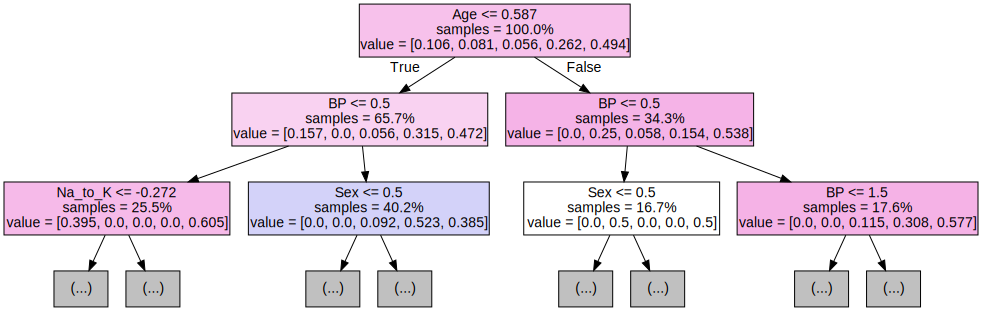

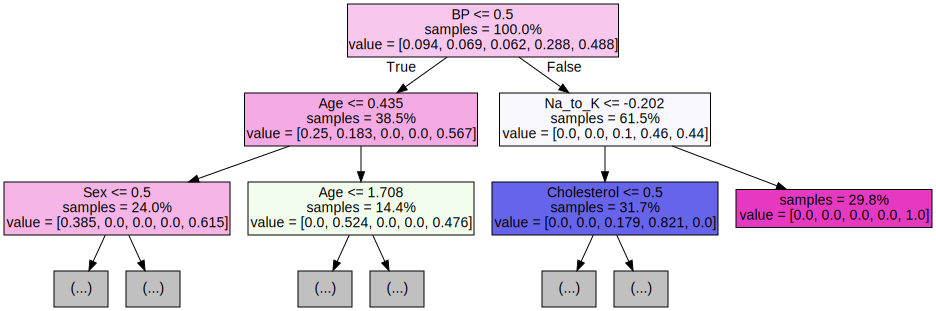

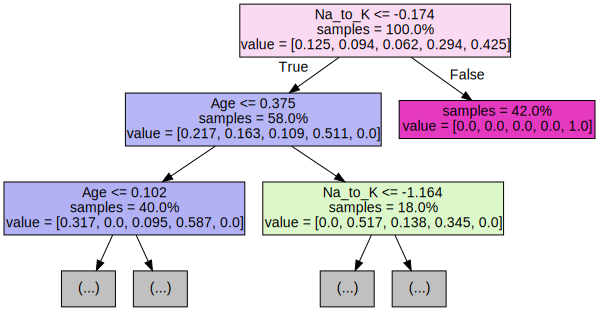

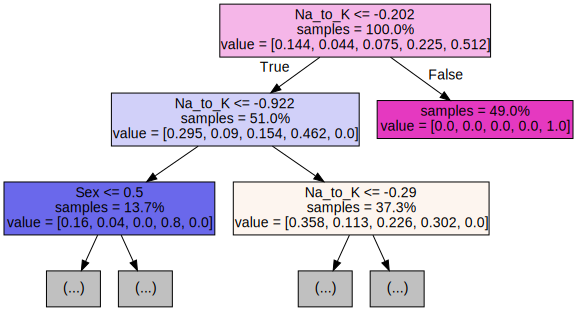

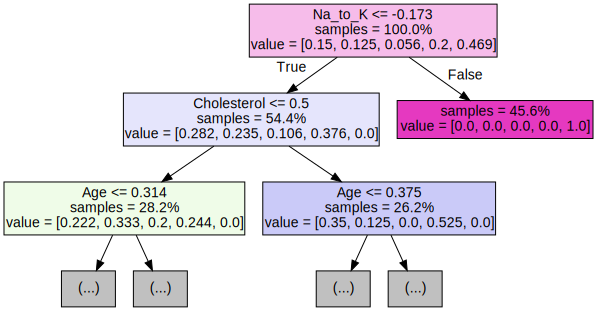

In [110]:
for i in range(5):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

**Xgboost**


In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

X = data.drop('Drug', axis=1)
y = data['Drug']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
# Decode predicted labels
y_test_decoded = label_encoder.inverse_transform(y_test)
xgb_predictions_decoded = label_encoder.inverse_transform(xgb_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_predictions))
print("Classification Report:")
print(classification_report(y_test_decoded, xgb_predictions_decoded))


XGBoost Accuracy: 0.975
Confusion Matrix:
[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  1  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.80      0.89         5
       drugX       0.92      1.00      0.96        11
       drugY       1.00      1.00      1.00        15

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40



**Catboost**


In [119]:
cat_model = CatBoostClassifier(random_state=42, verbose=False)

cat_model.fit(x_train, y_train)

cat_predictions = cat_model.predict(x_test)

cat_accuracy = accuracy_score(y_test, cat_predictions)
print(f"CatBoost Accuracy: {cat_accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, cat_predictions))
print("Classification Report:")
print(classification_report(y_test, cat_predictions))


CatBoost Accuracy: 1.0
Confusion Matrix:
[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



**Ensemble methods**

In [113]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
xgb_model = XGBClassifier(random_state=42)
cat_model = CatBoostClassifier(random_state=42, verbose=False)
ensemble_model = VotingClassifier(estimators=[
    ('xgb', xgb_model),
    ('cat', cat_model)
], voting='hard')


In [114]:
ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7c87041ed4b0>)])

In [115]:
# Predictions on the test set
print("X_test shape:", X_test.shape)


X_test shape: (40, 5)


In [116]:
ensemble_predictions = []
for model in ensemble_model.estimators_:
    predictions = model.predict(X_test)
    ensemble_predictions.append(predictions.flatten())

# Convert predictions to a NumPy array
ensemble_predictions = np.vstack(ensemble_predictions).T

# Use a simple majority vote for classification
final_predictions = np.median(ensemble_predictions, axis=1).astype(int)


In [117]:
y_test_decoded = label_encoder.inverse_transform(y_test)
final_predictions_decoded = label_encoder.inverse_transform(final_predictions)



In [120]:
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, final_predictions))
print("Classification Report:")
print(classification_report(y_test_decoded, final_predictions_decoded))

Ensemble Accuracy: 1.0
Confusion Matrix:
[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

